In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.impute import SimpleImputer

In [ ]:
credit = pd.read_csv('https://raw.githubusercontent.com/EllaMahaliaaa/Credit-Risk-Classification/main/customer_data.csv')

In [ ]:
credit

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,0,58988196,5,1289.0,1,173000.0,2,15,5,112,3,350702,200.000000
1121,0,58987926,5,NaN,2,50000.0,2,15,5,108,4,450000,169.000000
1122,0,58995381,7,1220.0,3,76000.0,2,11,2,90,5,71002,1.000000
1123,0,58998054,4,1250.0,3,137000.0,2,8,5,90,5,72000,1.000000


In [ ]:
credit.drop(columns=['id'], inplace=True)

In [ ]:
credit.head()

,label,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [ ]:
credit.shape

(1125, 12)

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   fea_1   1125 non-null   int64  
 2   fea_2   976 non-null    float64
 3   fea_3   1125 non-null   int64  
 4   fea_4   1125 non-null   float64
 5   fea_5   1125 non-null   int64  
 6   fea_6   1125 non-null   int64  
 7   fea_7   1125 non-null   int64  
 8   fea_8   1125 non-null   int64  
 9   fea_9   1125 non-null   int64  
 10  fea_10  1125 non-null   int64  
 11  fea_11  1125 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 105.6 KB


In [ ]:
X = credit[['fea_1','fea_2','fea_3','fea_4','fea_5','fea_6','fea_7','fea_8','fea_9','fea_10','fea_11']].values

In [ ]:
y = credit[['label']].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [ ]:
X_train

array([[5.00000000e+00, 1.31450000e+03, 3.00000000e+00, ...,
        5.00000000e+00, 6.00180000e+04, 2.00000000e+02],
       [7.00000000e+00, 1.24850000e+03, 3.00000000e+00, ...,
        3.00000000e+00, 6.00740000e+04, 1.00000000e+00],
       [7.00000000e+00, 1.24100000e+03, 3.00000000e+00, ...,
        5.00000000e+00, 7.20000000e+04, 1.00000000e+00],
       ...,
       [5.00000000e+00, 1.21400000e+03, 3.00000000e+00, ...,
        4.00000000e+00, 7.20000000e+04, 2.00000000e+02],
       [4.00000000e+00, 1.24100000e+03, 3.00000000e+00, ...,
        3.00000000e+00, 7.20000000e+04, 2.55483855e+02],
       [7.00000000e+00,            nan, 2.00000000e+00, ...,
        4.00000000e+00, 6.00640000e+04, 1.73205081e+02]])

In [ ]:
if np.isnan(X_train).any():
    # Handling NaN values in X_train
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [ ]:
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7509312263162138


In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=32)


In [ ]:
result = cross_val_score(knn, X_train, y_train.ravel(), cv = skf, scoring='accuracy')

print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7483771502758845


In [ ]:
# Predicting the Test set results
y_pred = knn.predict(X_train)

# Getting a set of the Predicted probabilities
probs_y= knn.predict_proba(X_train)

In [ ]:
# Creating the probability dataframe
probability = pd.DataFrame(probs_y * 100 , columns =[['1(%)', '0(%)']])

In [ ]:
# Creating a dataframe with the predictions
y_pred_df = pd.DataFrame(y_pred, columns = [['y_pred']])

In [ ]:
# Creating a dataframe with the acutal values
y_test_df = pd.DataFrame(y_test, columns = [['y_test']])

In [ ]:
# Creating a dataframe with the actual values, the predicted values
# and the probabilites which such predictions were made
comparison_of_true_pred = pd.concat([y_test_df, y_pred_df, probability], axis = 1)

In [ ]:
comparison_of_true_pred

,y_test,y_pred,1(%),0(%)
0,0.0,0,100.0,0.0
1,1.0,0,60.0,40.0
2,0.0,1,40.0,60.0
3,0.0,0,80.0,20.0
4,0.0,0,60.0,40.0
...,...,...,...,...
782,NaN,0,100.0,0.0
783,NaN,0,80.0,20.0
784,NaN,0,80.0,20.0
785,NaN,0,80.0,20.0


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (787, 11)
y_train shape: (787, 1)
X_test shape: (338, 11)
y_test shape: (338, 1)


In [ ]:
confusion_matrix(y_train, y_pred)

array([[597,  25],
       [125,  40]])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       622
           1       0.62      0.24      0.35       165

    accuracy                           0.81       787
   macro avg       0.72      0.60      0.62       787
weighted avg       0.78      0.81      0.78       787



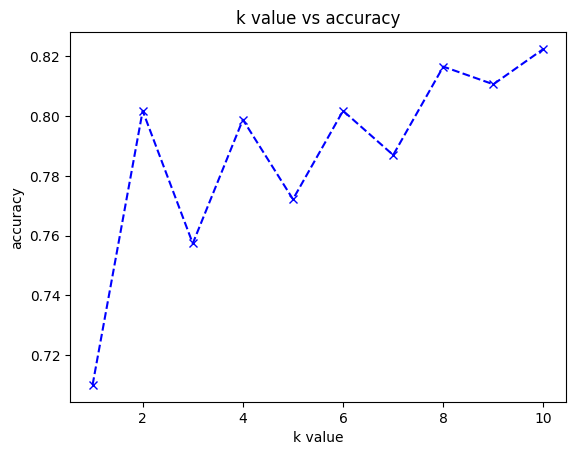

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = []

for i in range(1,11):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train.ravel())
  y_pred = knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred.ravel()))
plt.plot(list(range(1,11)), accuracy, color='blue', linestyle='dashed', marker='x')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.title('k value vs accuracy')
plt.show()

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(knn, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)